In [1]:
# Import Libraries
import matplotlib
matplotlib.use('TkAgg')
from matplotlib import rc
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import scipy
from scipy import ndimage
from matplotlib.lines import Line2D
from pylab import *

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
regxy = np.loadtxt('Region_xy_centroid.reg')
regx = regxy[0:,0]-1
regy = regxy[0:,1]-1
print len(regx)


4285


In [3]:
ahdu_list1 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits')
ahdu_list1.info()
aimage_data1 = ahdu_list1[0].data
ahdu_list1.close()
fhdu_list1 = fits.open('NGC628_SN3_1.0.LineMaps.map.6563.fwhm.clean.fits')
fhdu_list1.info()
fimage_data1 = fhdu_list1[0].data
fhdu_list1.close()


dis= fits.open('NGC628_distance_grow.fits')
dis.info()
d = dis[0].data
dis.close()


gr= fits.open('NGC628_HIIPhot3_All_GROW.fits')
gr.info()
grow = gr[0].data
gr.close()

flux=aimage_data1*fimage_data1*10*1.20671
flux[(np.isfinite(flux) == False)]=0


Filename: NGC628_SN3_1.0.LineMaps.map.6563.amplitude.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_SN3_1.0.LineMaps.map.6563.fwhm.clean.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
Filename: NGC628_distance_grow.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU       9   (2048, 2064)   float32   
Filename: NGC628_HIIPhot3_All_GROW.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   


498
426.374
4.02091e-19


<IPython.core.display.Javascript object>


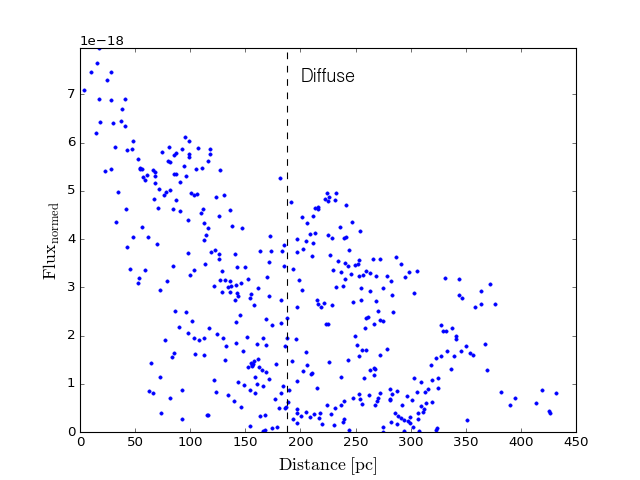

In [7]:
%matplotlib nbagg
#for i in range(0,len(regx)) :

#name = 'Asymetric'
#i=2986

#name = 'Spheric'
#i=2436

name = 'Diffuse'
i=4267

#name = 'Filamentary'
#i=2687
#i=159

#    flux_central[i] = np.sum(flux[round(regy[i])-3:round(regy[i])+1,round(regx[i])-3:round(regx[i])+1])
#    flux_tot[i] = np.sum(flux[(grow == i) & (d < 250)])*10*1.20671
#    flux_central[i] = image[round(regy[i])-1,round(regx[i])-1]*10*1.20671

dist = np.array(len(np.where(grow == i+1)[0]))
flux_prof = np.array(len(np.where(grow == i+1)[0]))
print len(np.where(grow == i+1)[0])

xxyy=np.where(grow == i+1)
dist=d[xxyy[0],xxyy[1]]
flux_prof=flux[xxyy[0],xxyy[1]]



print d[xxyy[0][0],xxyy[1][0]]
print flux[xxyy[0][0],xxyy[1][0]]
#flux_central = flux_central*4*3.1415926*(9.006*1000000*3.086e18)**2
#flux_tot = flux_tot*4*3.1415926*(9.006*1000000*3.086e18)**2
#flux_central = np.log10(flux_central)
#flux_tot = np.log10(flux_tot)
#for i in range(0,len(regx)) :
#    flux_central[(np.sum(centre[round(regy[i])-8:round(regy[i])+6,round(regx[i])-8:round(regx[i])+6]) > 1)] = 0
#flux_central[(np.isfinite(flux_central) == False)] = 0
#flux_tot[(np.isfinite(flux_tot) == False)] = 0

max = np.mean(flux_prof[(dist == np.min(dist))])
plt.plot(dist,flux_prof,'.b')
plt.ylabel('$\mathrm{Flux_{normed}}$', fontname='Helvetica',fontsize=16)
plt.xlabel('$\mathrm{Distance\,\,[pc]}$', fontname='Helvetica',fontsize=16)
plt.annotate(name,xy=(0.5,0.9),xycoords='axes fraction',\
            fontsize=16.0, horizontalalignment='center',verticalalignment='bottom', color='k', fontname='Helvetica')
plt.axhline(2.916e-18/max, color='k', linestyle='--')
plt.axvline(187.5, color='k', linestyle='--')
plt.ylim(0,np.max(flux_prof))
plt.show()

In [35]:
#Save the Plot in a .eps or .png file
plt.savefig('Lum_prof_fila.eps')
#plt.savefig('test.png', dpi=1000)

In [70]:
#fits.writeto('test_flux2.fits', im*4*3.1415926*(9.006*1000000*3.086e18)**2)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:34: RuntimeWarning: invalid value encountered in divide


<IPython.core.display.Javascript object>


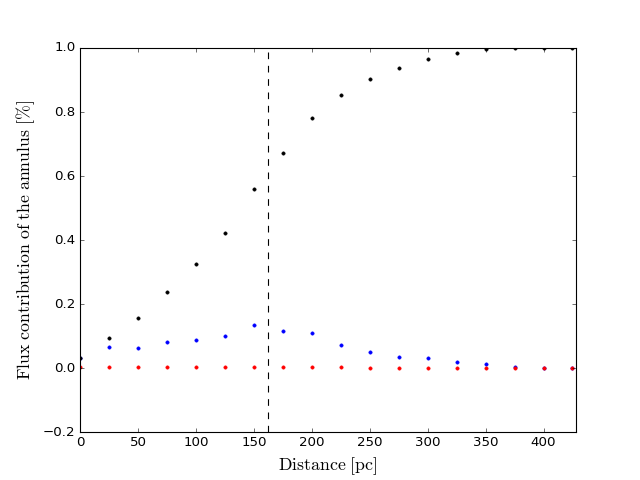

In [23]:
%matplotlib nbagg
taille = 2436
n = taille/25


#name = 'Asymetric'
#i=2986

#name = 'Spheric'
#i=2436

name = 'Diffuse'
i=3860

#name = 'Filamentary'
#i=2687

dist = np.array(len(np.where(grow == i+1)[0]))
flux_prof = np.array(len(np.where(grow == i+1)[0]))

xxyy=np.where(grow == i+1)
dist=d[xxyy[0],xxyy[1]]
flux_prof=flux[xxyy[0],xxyy[1]]


fl = np.zeros(n)
fll = np.zeros(n)
fl2 = np.zeros(n)
dl = np.zeros(n)

for i in range(0,n) :
    fl[i]= np.sum(flux_prof[(dist < i*25+25) & (dist > i*25)])
    fll[i]= np.sum(flux_prof[(dist < i*25+25)])
    fl2[i]= np.sum(flux_prof[(dist < i*25+25) & (dist > i*25)])/len(flux_prof[(dist < i*25+25) & (dist > i*25)])
    dl[i] = i*25

plt.ylabel('$\mathrm{Flux\,\,contribution\,\,of\,\,the\,\,annulus\,\,[\%]}$', fontname='Helvetica',fontsize=16)
plt.xlabel('$\mathrm{Distance\,\,[pc]}$', fontname='Helvetica',fontsize=16)
#max = np.mean(fl[(dl == np.min(dl))])
plt.xlim(0,np.max(dist))
plt.plot( dl, fl/np.sum(fl), '.b')
plt.plot( dl, fll/np.sum(fl), '.k')
plt.plot( dl, fl2/np.sum(fl), '.r')
plt.axvline(162.5, color='k', linestyle='--',label='Limit' )
plt.show()

In [68]:
#Save the Plot in a .eps or .png file
plt.savefig('Lum_prof_hist.eps')
#plt.savefig('test.png', dpi=1000)

352
136.084
2.45523e-17


<IPython.core.display.Javascript object>


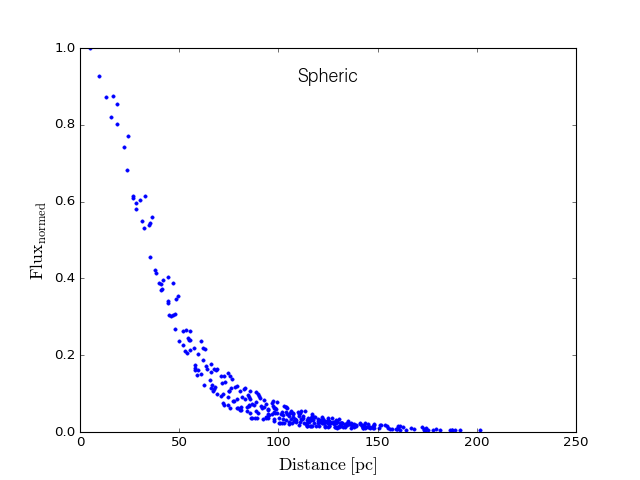

In [15]:

%matplotlib nbagg
#for i in range(0,len(regx)) :

#name = 'Asymetric'
#i=2986

name = 'Spheric'
i=2436

#name = 'Diffuse'
#i=833

#name = 'Filamentary'
#i=2687

#    flux_central[i] = np.sum(flux[round(regy[i])-3:round(regy[i])+1,round(regx[i])-3:round(regx[i])+1])
#    flux_tot[i] = np.sum(flux[(grow == i) & (d < 250)])*10*1.20671
#    flux_central[i] = image[round(regy[i])-1,round(regx[i])-1]*10*1.20671

dist = np.array(len(np.where(grow == i+1)[0]))
flux_prof = np.array(len(np.where(grow == i+1)[0]))
print len(np.where(grow == i+1)[0])

xxyy=np.where(grow == i+1)
dist=d[xxyy[0],xxyy[1]]
flux_prof=flux[xxyy[0],xxyy[1]]



print d[xxyy[0][0],xxyy[1][0]]
print flux[xxyy[0][0],xxyy[1][0]]
#flux_central = flux_central*4*3.1415926*(9.006*1000000*3.086e18)**2
#flux_tot = flux_tot*4*3.1415926*(9.006*1000000*3.086e18)**2
#flux_central = np.log10(flux_central)
#flux_tot = np.log10(flux_tot)
#for i in range(0,len(regx)) :
#    flux_central[(np.sum(centre[round(regy[i])-8:round(regy[i])+6,round(regx[i])-8:round(regx[i])+6]) > 1)] = 0
#flux_central[(np.isfinite(flux_central) == False)] = 0
#flux_tot[(np.isfinite(flux_tot) == False)] = 0

max = np.mean(flux_prof[(dist == np.min(dist))])
plt.plot(dist,flux_prof/max,'.b')
plt.ylabel('$\mathrm{Flux_{normed}}$', fontname='Helvetica',fontsize=16)
plt.xlabel('$\mathrm{Distance\,\,[pc]}$', fontname='Helvetica',fontsize=16)
plt.annotate(name,xy=(0.5,0.9),xycoords='axes fraction',\
            fontsize=16.0, horizontalalignment='center',verticalalignment='bottom', color='k', fontname='Helvetica')
plt.show()

In [10]:

r= fits.open('NGC628_SITELLE_rayon_pc_carte.fits')
r.info()
ra = r[0].data
r.close()


Filename: NGC628_SITELLE_rayon_pc_carte.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      71   (2048, 2064)   float32   
